In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
11559,Plot Area,18-Apr,1Kasavanhalli,18 Bedroom,HMwerCo,1200,18.0,NaN,200.0
3211,Built-up Area,Ready To Move,7th Phase JP Nagar,7 Bedroom,NaN,4800,7.0,0.0,170.0
2447,Super built-up Area,Ready To Move,Sarjapur Road,3 BHK,Srisei,1428,2.0,2.0,66.0
5708,Plot Area,Ready To Move,Jigani,4 Bedroom,Ceeury,133.3Sq. Yards,3.0,2.0,160.0
7216,Super built-up Area,Ready To Move,Hormavu,2 BHK,SLtraks,1143,2.0,1.0,53.0


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df.drop(['area_type','availability','society'],axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df2.dropna(subset=['size','bath','balcony'],how='all',inplace=True)

In [10]:
df2.isnull().sum()

location        1
size            0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [11]:
df2.dropna(subset=['bath','balcony'],how='all',inplace=True)

In [12]:
df2.isnull().sum()

location        1
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [13]:
df2[df2['location'].isnull()]

,location,size,total_sqft,bath,balcony,price
568,NaN,3 BHK,1600,3.0,2.0,86.0


In [14]:
df2.drop(568,inplace=True)

In [15]:
df2.isnull().sum()

location        0
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [16]:
df2.balcony.describe()

count    12710.000000
mean         1.584343
std          0.817287
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [17]:
df2.price.describe()

count    13246.000000
mean       112.389392
std        149.076587
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

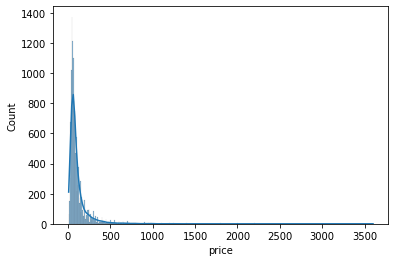

In [18]:
#plt.figure(figsize=(50,20))
sns.histplot(df2.price,bins=500,kde=True)

In [19]:
df2[(df2.balcony.isnull()) & (df2['price']>50) & (df2['price']<70)].shape

(29, 6)

In [20]:
df2[(df2['balcony']==3) & (df2['price']>150) & (df2['price']<200)]
# 246 with 3 balcony and price between 90-70 with 1 is 631 2 is 716
# 324 with 3 balcony and price between 50-70  with 1 is 1173  2 is 1129
# 209 with 3 balcony and price between 120-90 with 1 is 395  2 is 590
# 117 with 3 between 120-150 with 2 is 389 with 1 is 194
# 156 with 1 between 150-200 with 2 is 275 with 3 is 146

,location,size,total_sqft,bath,balcony,price
89,Rajaji Nagar,6 Bedroom,710,6.0,3.0,160.0
323,Akshaya Vana,4 Bedroom,1200,4.0,3.0,165.0
481,Basavangudi,4 Bedroom,1125,4.0,3.0,180.0
516,Haralur Road,4 BHK,2805,5.0,3.0,154.0
559,Marathahalli,4 Bedroom,1780,4.0,3.0,175.0
...,...,...,...,...,...,...
12963,Uttarahalli,4 Bedroom,1200,4.0,3.0,155.0
12993,Judicial Layout,5 BHK,1100,4.0,3.0,199.0
13124,Yeshwanthpur,3 BHK,1876,3.0,3.0,160.0
13134,"Thanisandra Main Road,",4 BHK,2872,4.0,3.0,183.0


In [21]:
df2[ (df2['price']>500) ].price.unique()# potential outliers

array([ 600.,  650.,  760., 2200.,  700.,  528.,  660., 1250.,  550.,
        640.,  900.,  560.,  775.,  675.,  800.,  525., 1200., 1015.,
        696.,  540.,  625.,  830.,  580.,  520.,  510.,  629., 1000.,
        558., 2100.,  864.,  627.,  570.,  515.,  725., 1500., 2700.,
        720.,  750., 2050.,  986.,  530.,  763.,  850., 1900., 1700.,
        950.,  899.,  901., 1150.,  598.,  501., 1102., 1100.,  972.,
        815., 2250., 1584., 2000.,  980.,  662., 1063.,  795.,  511.,
       1600.,  943.,  792., 1400.,  590., 1850.,  995., 1675.,  936.,
        523.,  718.,  821., 1800.,  785.,  615., 1950.,  578.,  559.,
       2340.,  595.,  975.,  536.,  852.,  630., 2912.,  716.,  788.,
        699.,  602., 2736.,  601.,  610., 2600.,  744.,  948.,  649.,
        680., 1824., 3600.,  988., 2800.])

In [22]:
df2['BHK'] = df2['size'].apply(lambda x:int(x.split()[0]))

In [23]:
df2.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [24]:
df2.shape

(13246, 7)

In [25]:
df2.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

#  A typical 1BHK can be built in approximately 400 square feet of area.

In [26]:
df2[(df2.BHK<20) & (df2.BHK>10)]

,location,size,total_sqft,bath,balcony,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,3.0,360.0,11
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,0.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,NaN,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,NaN,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,3.0,150.0,11
4916,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,2.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,NaN,150.0,11
9935,1Hoysalanagar,13 BHK,5425,13.0,0.0,275.0,13
11559,1Kasavanhalli,18 Bedroom,1200,18.0,NaN,200.0,18


In [27]:
1718,4684,1768,3379,3853,4916,6533,11559

(1718, 4684, 1768, 3379, 3853, 4916, 6533, 11559)

In [28]:
df2.drop([1718,4684,1768,3379,3853,4916,6533,11559],inplace=True)

In [29]:
df2.shape

(13238, 7)

In [30]:
df2[df2.duplicated()]

,location,size,total_sqft,bath,balcony,price,BHK
242,Chandapura,1 BHK,645,1.0,1.0,16.45,1
887,Chandapura,2 BHK,1015,2.0,2.0,25.88,2
905,Kanakpura Road,1 BHK,525,1.0,1.0,26.00,1
971,Haralur Road,3 BHK,1464,3.0,2.0,56.00,3
1115,Haralur Road,2 BHK,1027,2.0,2.0,44.00,2
...,...,...,...,...,...,...,...
13285,VHBCS Layout,2 BHK,1353,2.0,2.0,110.00,2
13299,Whitefield,4 BHK,2830 - 2882,5.0,0.0,154.50,4
13311,Ramamurthy Nagar,7 Bedroom,1500,9.0,2.0,250.00,7
13313,Uttarahalli,3 BHK,1345,2.0,1.0,57.00,3


In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,NaN,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [33]:
def converting_ranges_to_one_number(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [34]:
converting_ranges_to_one_number('555ki')

In [35]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(converting_ranges_to_one_number)

In [36]:
df3.total_sqft

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13238, dtype: float64

In [37]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.shape

(13238, 8)

In [38]:
df4.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [39]:
len(df4.location.unique())

1298

In [40]:
 df4.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [47]:
df4.groupby("location")

In [45]:
locationsgroupby = df4.groupby('location')

In [46]:
len(locationsgroupby)

1298

In [49]:
locationsgroupby.size()#.sort_values(ascending=False)

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Length: 1298, dtype: int64

In [50]:
# to remove the extra spaces in the locations
df4.location = df4.location.apply(lambda x: x.strip())
locations_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations_stats

location
Whitefield                     535
Sarjapur  Road                 392
Electronic City                304
Kanakpura Road                 266
Thanisandra                    236
                              ... 
Karnataka Shabarimala            1
Kasthuri Nagar East Of NGEF      1
Kathriguppe IV Phase             1
Keerthi Layout                   1
whitefiled                       1
Name: location, Length: 1287, dtype: int64

In [51]:
# now putting all the locations which have less than 10 data points be referred to as others
len(locations_stats[locations_stats<=10])

1046

In [52]:
locations_with_less_than_10_datapoints = locations_stats[locations_stats<=10]
locations_with_less_than_10_datapoints

location
Nagappa Reddy Layout           10
Ganga Nagar                    10
1st Block Koramangala          10
Naganathapura                  10
Dairy Circle                   10
                               ..
Karnataka Shabarimala           1
Kasthuri Nagar East Of NGEF     1
Kathriguppe IV Phase            1
Keerthi Layout                  1
whitefiled                      1
Name: location, Length: 1046, dtype: int64

In [53]:
df4.location = df4.location.apply(lambda x: 'Others' if x in locations_with_less_than_10_datapoints else x)

In [54]:
len(df4.location.unique())

242

In [55]:
df4.isnull().sum()

location            0
size                0
total_sqft         46
bath                0
balcony           534
price               0
BHK                 0
price_per_sqft     46
dtype: int64

# A typical 1BHK can be built in approximately 400 square feet of area.

In [56]:
df4[(df4.total_sqft/df4.BHK)<390]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,Others,6 Bedroom,1020.0,6.0,NaN,370.0,6,36274.509804
26,Electronic City,2 BHK,660.0,1.0,1.0,23.1,2,3500.000000
29,Electronic City,3 BHK,1025.0,2.0,1.0,47.0,3,4585.365854
31,Bisuvanahalli,3 BHK,1075.0,2.0,1.0,35.0,3,3255.813953
35,Kanakpura Road,2 BHK,700.0,2.0,1.0,36.0,2,5142.857143
...,...,...,...,...,...,...,...,...
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13300,Hosakerehalli,5 Bedroom,1500.0,6.0,2.0,145.0,5,9666.666667
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649
13306,Others,4 Bedroom,1200.0,5.0,NaN,325.0,4,27083.333333


In [57]:
df5 = df4[~((df4.total_sqft/df4.BHK)<390)]
df5.shape

(11820, 8)

In [58]:
df5.isnull().sum()

location            0
size                0
total_sqft         46
bath                0
balcony           418
price               0
BHK                 0
price_per_sqft     46
dtype: int64

In [59]:
df5.dropna(subset=['total_sqft','price_per_sqft'],how='all',inplace=True)

C:\Users\mynam\AppData\Roaming\Python\Python310\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [60]:
df5.isnull().sum()

location            0
size                0
total_sqft          0
bath                0
balcony           414
price               0
BHK                 0
price_per_sqft      0
dtype: int64

In [61]:
df5.shape

(11774, 8)

In [62]:
df5.price_per_sqft.describe()

count     11774.000000
mean       6177.648579
std        4003.716638
min         267.829813
25%        4202.714967
50%        5272.418058
75%        6797.406061
max      176470.588235
Name: price_per_sqft, dtype: float64

In [110]:
def remove_pps_outliers(df):
    dff = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m =np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-1*st)) & (subdf.price_per_sqft<(m+1*st))]
        dff= pd.concat([dff,reduced_df],ignore_index=True)
    return dff

In [111]:
df6 = remove_pps_outliers(df5)
df6.shape

(9559, 8)

In [112]:
df6.price_per_sqft.describe()

count     9559.000000
mean      5615.908382
std       2185.144502
min        912.151821
25%       4250.000000
50%       5166.846071
75%       6382.299828
max      24509.803922
Name: price_per_sqft, dtype: float64

(array([5.750e+02, 5.300e+03, 2.756e+03, 5.200e+02, 2.500e+02, 9.800e+01,
        3.800e+01, 1.300e+01, 5.000e+00, 4.000e+00]),
 array([  912.15182124,  3271.91703128,  5631.68224131,  7991.44745134,
        10351.21266137, 12710.97787141, 15070.74308144, 17430.50829147,
        19790.2735015 , 22150.03871154, 24509.80392157]),
 <BarContainer object of 10 artists>)

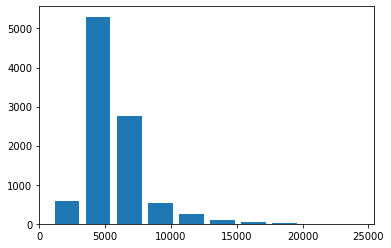

In [121]:
plt.hist(df6.price_per_sqft,rwidth=0.8)

<AxesSubplot:xlabel='price', ylabel='Count'>

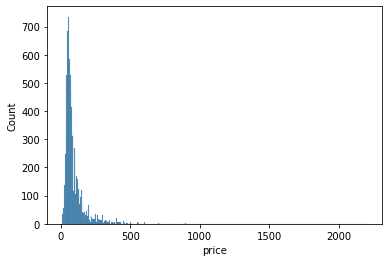

In [114]:
sns.histplot(df6.price)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

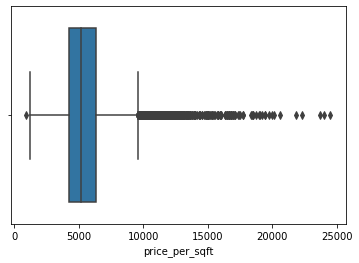

In [117]:
sns.boxplot(df6.price_per_sqft)